<a href="https://colab.research.google.com/github/noctxrne/ICT-Notes/blob/main/14_Logistic_Regression%2C_Naive_Bayes%2C_KNN%2C_hyperparameters_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Accuracy=TP + TN/FP + FN + FP + TN
* Precision=TP/TP + FP
* Recall=TP/TP + FN
* F1 Score = 2*(Recall*Precision) / (Recall + Precision)

# **Social Network**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
socialNetwork=pd.read_csv("/content/Social_Network_Ads.csv")


In [ ]:
socialNetwork

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
socialNetwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
socialNetwork.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
socialNetwork['Purchased'].value_counts(normalize=True)

,proportion
Purchased,
0,0.6425
1,0.3575


In [ ]:
socialNetwork=pd.get_dummies(socialNetwork,columns=['Gender'],dtype='int64')

In [ ]:
socialNetwork.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

<Axes: >

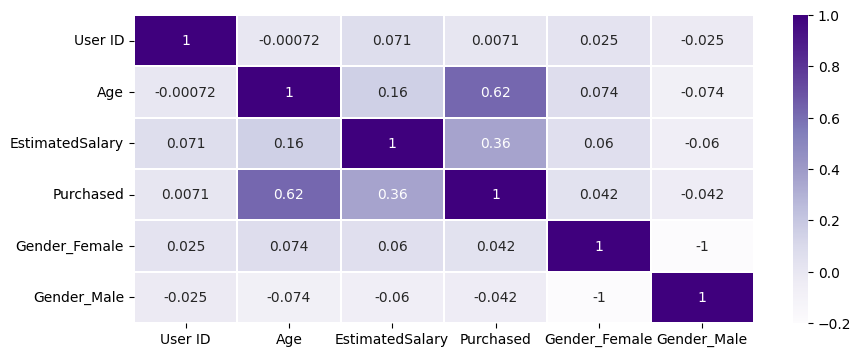

In [ ]:
corr_matrix=socialNetwork.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,vmin=-.2,vmax=1,annot=True,linewidths=0.2,cmap='Purples')

In [ ]:
x=socialNetwork.drop(['User ID','Purchased'],axis=1)
y=socialNetwork['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [ ]:
x_train.shape

(320, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred= logit_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('F1 Score is',f1_score(y_test,y_pred))


Accuracy is 0.8875
Precision is 0.9130434782608695
Recall is 0.75
F1 Score is 0.8235294117647058


In [ ]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 7, 21]])

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

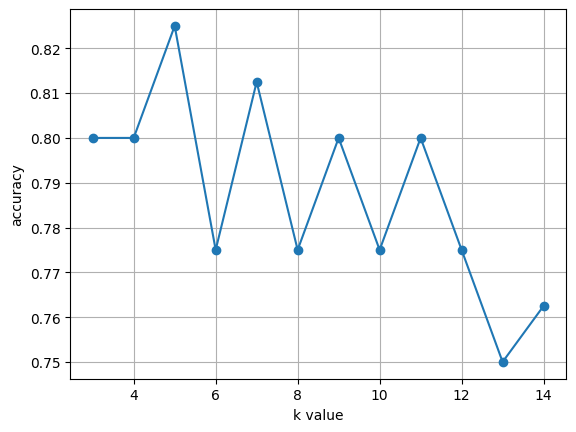

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier =KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('f1 Score:',f1_score(y_test,y_pred))

Accuracy: 0.825
Precision: 0.7692307692307693
Recall: 0.7142857142857143
f1 Score: 0.7407407407407407


In [ ]:
confusion_matrix(y_test,y_pred)

array([[46,  6],
       [ 8, 20]])

# **IRIS**

In [ ]:
import seaborn as sns
iris=sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
